In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd

import os
from io import open
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

import kgml_lib

In [2]:
from dataset import Step5_DataSet
from KGMLag_CO2_finetune_modularized import Kgml_Model

In [3]:
root_dir = 'E:/PyKGML/deposit_code_v2/'
data_path = root_dir +  'processed_data/'
output_path = root_dir + 'test_results/'

pretrained_model = "recotest_v11_exp4.sav_step4"
output_model = "recotest_v11_exp4_sample.sav_step5"
synthetic_data = "sys_data10.sav"

In [4]:
dataset = Step5_DataSet(data_path, output_path)
dataset.load_scaler_data('recotest_data_scaled_v4_scalers.sav')
dataset.load_fluxtower_inputs_data('fluxtower_inputs_noscale_v2.sav')
dataset.load_fluxtower_observe_data('fluxtower_observe_noscale_v2.sav')

dataset.prepare_data('flux_split_year_v1.sav')

torch.Size([3285]) torch.Size([1, 3285, 19])
torch.Size([1825]) torch.Size([1, 1825, 19])
torch.Size([2555]) torch.Size([1, 2555, 19])
torch.Size([2555]) torch.Size([1, 2555, 19])
torch.Size([5110]) torch.Size([1, 5110, 19])
torch.Size([3650]) torch.Size([1, 3650, 19])
torch.Size([6935]) torch.Size([1, 6935, 19])
torch.Size([6935]) torch.Size([1, 6935, 19])
torch.Size([6935]) torch.Size([1, 6935, 19])
torch.Size([4015]) torch.Size([1, 4015, 19])
torch.Size([1460]) torch.Size([1, 1460, 19])


In [5]:
model = Kgml_Model(output_path, output_path, pretrained_model, output_model, synthetic_data, dataset= dataset)
model.load_RecoGRU_multitask_v11_3()

model.load_synthetic_data()

model.get_Ra_Rh_daily()

GPU is available. Using: cuda


In [7]:
model.train_step5()

gru_Ra.weight_ih_l0
gru_Ra.weight_hh_l0
gru_Ra.bias_ih_l0
gru_Ra.bias_hh_l0
gru_Rh.weight_ih_l0
gru_Rh.weight_hh_l0
gru_Rh.bias_ih_l0
gru_Rh.bias_hh_l0
gru_Rh.weight_ih_l1
gru_Rh.weight_hh_l1
gru_Rh.bias_ih_l1
gru_Rh.bias_hh_l1
gru_NEE.weight_ih_l0
gru_NEE.weight_hh_l0
gru_NEE.bias_ih_l0
gru_NEE.bias_hh_l0
densor_Ra.weight
densor_Ra.bias
densor_Rh.weight
densor_Rh.bias
densor_NEE.weight
densor_NEE.bias
finished training epoch 1
train_loss:  [31.184111803632195, 31.107728589654428, 0.07638321397776178, 0.22348644275728208, 0.0] train_R2 [0.8622477045794944, 0.9096123086001121] val_loss: [0.4636816291000973, 0.45153806151985204, 0.01214356758024526, 0.06011922444613664, 0.0] val_R2 [0.8793052848175072, 0.9163108514142497] loss val best: 0.4636816291000973 R2 val best: [0.8793052848175072, 0.9163108514142497] Spending time: 6.573111057281494s
finished training epoch 2
train_loss:  [25.01586009548487, 24.818089044636427, 0.1977710508484459, 0.20894836620017462, 0.16348317736073545] train_R

KeyboardInterrupt: 

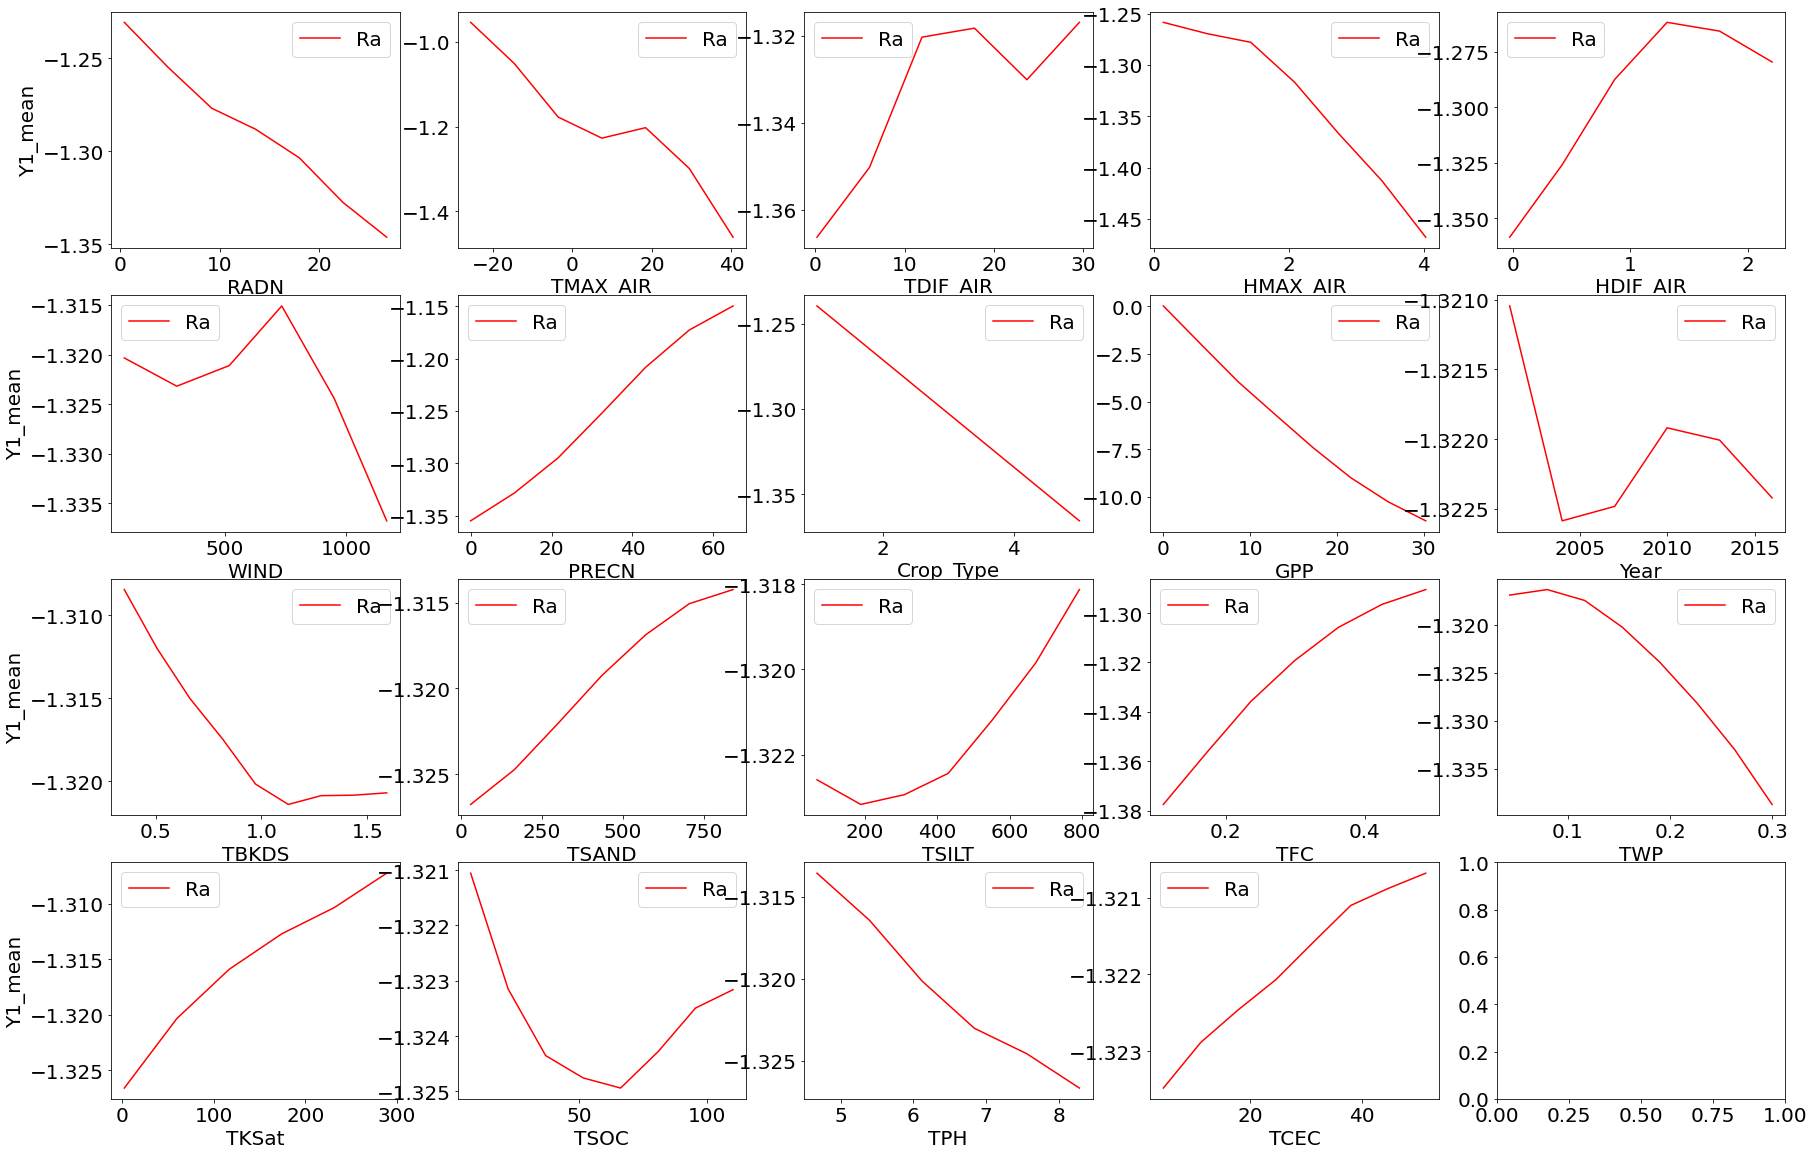

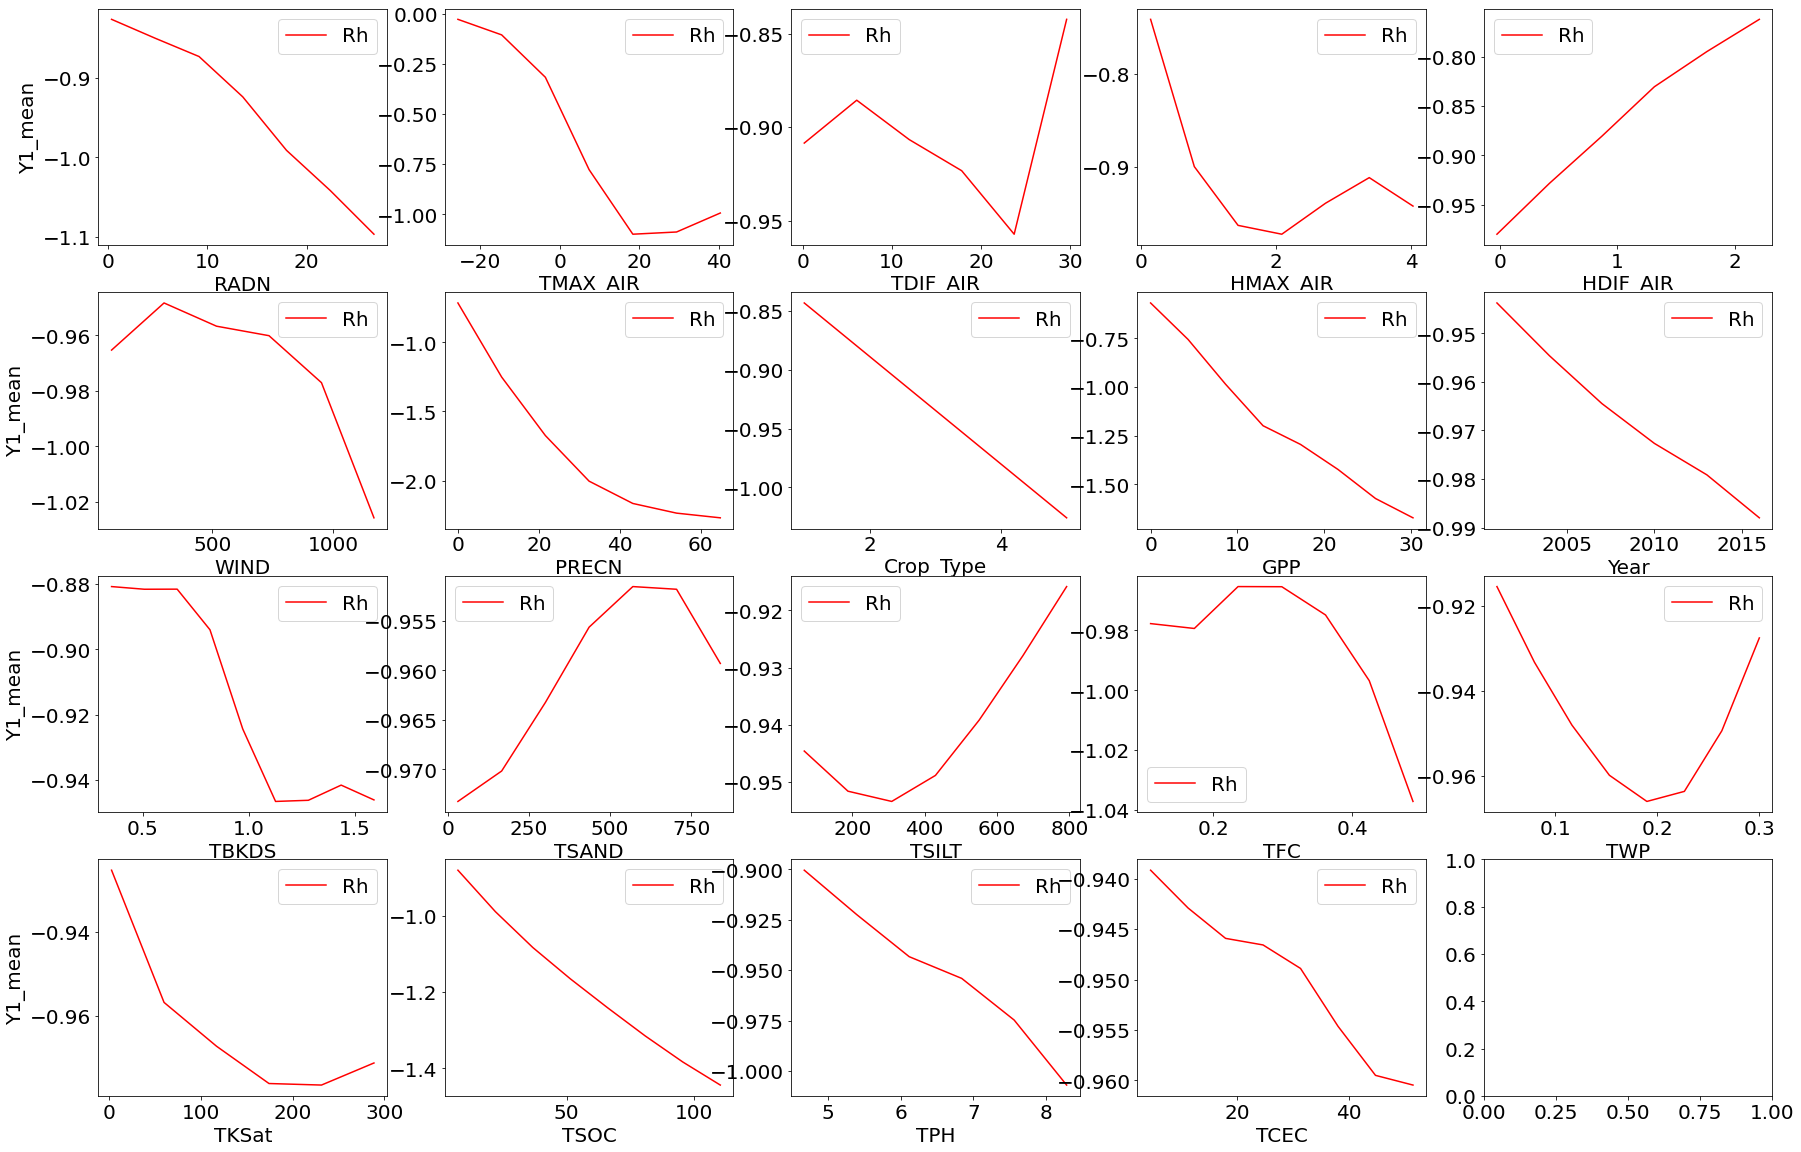

In [8]:
model.vis_Ra_Rh()